In [135]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.ensemble import RandomForestRegressor

In [136]:
data = pd.read_csv('nschool_data.csv')

In [137]:
data.head()

,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,55,37,67.3,17,30.9,45.9,0,0.0,0.0,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
1,64,43,67.2,27,42.2,62.8,0,0.0,0.0,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
2,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
3,78,44,56.4,37,47.4,84.1,0,0.0,0.0,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
4,64,46,71.9,32,50.0,69.6,7,10.9,15.2,25,39.1,54.3,14,21.9,30.4,10,15.6,6,9.4


In [138]:
y = data['Still Enrolled - n']
data.drop('Still Enrolled - n', axis=1, inplace=True)

In [139]:
X_train, X_valid, y_train, y_valid = train_test_split(data.values, y.values, test_size=.3)

In [140]:
tree = RandomForestClassifier(max_depth=13).fit(X_train, y_train)

In [141]:
tree_pred_valid = tree.predict(X_valid)
tree_acc_valid = accuracy_score(y_valid, tree_pred_valid)
tree_acc_valid

0.29923939151321055

In [143]:
tree_params = {'max_depth': list(range(1, 15))}

tree_grid = GridSearchCV(RandomForestRegressor(random_state=17), 
                         tree_params, 
                         cv=5, scoring='neg_mean_squared_error') 

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

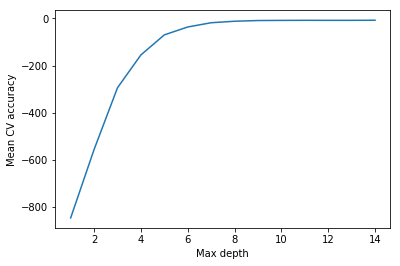

In [144]:
plt.plot(tree_params['max_depth'], 
         tree_grid.cv_results_['mean_test_score'])
plt.xlabel('Max depth')
plt.ylabel('Mean CV accuracy');

In [131]:
print("Best params:", tree_grid.best_params_)
print("Best cross validaton score", tree_grid.best_score_)

Best params: {'max_depth': 14}
Best cross validaton score 0.308596431023


In [132]:
tuned_tree_acc_valid = accuracy_score(y_valid, tree_grid.predict(X_valid))
tuned_tree_acc_valid

0.31164931945556446

In [100]:
accuracy_score(y_valid, [0] * y_valid.size)

0.72824813467349081

In [101]:
export_graphviz(
    tree,
    out_file='tree.dot',
    feature_names=data.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [102]:
pd.Series(tree_pred_valid).value_counts()

0.0    14488
1.0     1729
dtype: int64

In [103]:
pd.Series(y_valid).value_counts()

0.0    11810
1.0     4407
dtype: int64

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

for i in range(3, 20):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data[['musculoskeletal', 'blood', 'urinary', 'neurology', 'rheumatological',
       'cardiovascular', 'endocrinology']])
    cluster_labels = kmeans.fit_predict(data[['musculoskeletal', 'blood', 'urinary', 'neurology', 'rheumatological',
       'cardiovascular', 'endocrinology']])

    silhouette_avg = silhouette_score(data[['musculoskeletal', 'blood', 'urinary', 'neurology', 'rheumatological',
       'cardiovascular', 'endocrinology']], 
                                      cluster_labels, sample_size=10000)
    print(i, cluster_labels, silhouette_avg)

3 [2 2 2 ..., 0 0 0] 0.501385728736
4 [2 2 2 ..., 0 0 0] 0.567676460826
5 [3 3 3 ..., 2 2 2] 0.649901223427
6 [3 3 3 ..., 0 0 0] 0.692108852379
7 [2 2 2 ..., 1 1 1] 0.737903786998
8 [2 2 2 ..., 0 0 0] 0.76432973349
9 [2 2 2 ..., 0 0 0] 0.807406660627
10 [2 2 2 ..., 1 1 1] 0.831110973179
11 [3 3 3 ..., 2 2 2] 0.85615030311
12 [2 2 2 ..., 1 1 1] 0.874674667271
13 [2 2 2 ..., 0 0 0] 0.886578418502
14 [3 3 3 ..., 1 1 1] 0.892643572438
15 [0 0 0 ..., 1 1 1] 0.912706299427
16 [5 5 5 ..., 2 2 2] 0.926813930021
17 [2 2 2 ..., 4 4 4] 0.933505443862
18 [0 0 0 ..., 3 3 3] 0.930932722136
19 [3 3 3 ..., 0 0 0] 0.941125113459


In [107]:
data.columns

Index(['Age', 'Gender', 'BMI', 'gynecological', 'male_reproductive_system',
       'upper_respiratory', 'ophthalmic', 'pregnancy', 'infectious',
       'dermatological', 'immune', 'lymphatic', 'other', 'lower_respiratory',
       'musculoskeletal', 'blood', 'urinary', 'neurology', 'rheumatological',
       'cardiovascular', 'endocrinology'],
      dtype='object')